In [6]:
import xscen as xs
import xarray as xr
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
from xscen.config import CONFIG, load_config
import xscen as xs
from matplotlib import gridspec
from dask.distributed import Client
import xclim as xc
import dask
import numpy as np
import cartopy.feature as cfeature

load_config('../configuration/paths_ESPO-G_j.yml', '../configuration/config_ESPO-G_RDRS.yml', verbose=(__name__ == '__main__'), reset=True)
pcat = xs.ProjectCatalog(CONFIG['paths']['project_catalog'])
tdd = CONFIG['tdd']

INFO:xscen.config:Updated the config with ../configuration/paths_ESPO-G_j.yml.
INFO:xscen.config:Updated the config with ../configuration/config_ESPO-G_RDRS.yml.


# maps

In [8]:
#load all properties from ref, sim, scen

def maps(option_id, option_region, option_var):
    "Load properties and measures and plot them."
    
    # get data from catalogue
    ref = pcat.search( processing_level=['diag-ref-prop*', 'diag_ref_prop'], domain=option_region, variable=option_var).to_dask()
    sim = pcat.search(id= option_id, processing_level='diag-sim-prop*', domain=option_region, variable=option_var).to_dask()
    scen = pcat.search(id= option_id, processing_level='diag-scen-prop*', domain=option_region, variable=option_var).to_dask()
    meas_sim = pcat.search(id=option_id, processing_level='diag-sim-meas*', domain=option_region, variable=option_var).to_dask()
    meas_scen = pcat.search(id=option_id, processing_level='diag-scen-meas*', domain=option_region, variable=option_var).to_dask()

    #select variable
    prop_sim = sim[option_var]
    prop_ref = ref[option_var]
    prop_scen = scen[option_var]
    meas_scen_prop = meas_scen[option_var]
    meas_sim_prop = meas_sim[option_var]

    #set colormap
    maxi_prop = max(prop_ref.max().values, prop_scen.max().values, prop_sim.max().values)
    mini_prop = min(prop_ref.min().values, prop_scen.min().values, prop_sim.min().values)
    maxi_meas = max(abs(meas_scen_prop).max().values, abs(meas_sim_prop).max().values)
    cmap='viridis_r' if 'pr=pr' in prop_sim.attrs['history'] else 'plasma'
    cmap_meas ='BrBG' if 'pr=pr' in prop_sim.attrs['history']  else 'coolwarm'



    #plot
    fig = plt.figure(figsize=(15, 8))
    map_proj = ccrs.RotatedPole(pole_longitude=87.59703063964844,
                          pole_latitude=31.758316040039062,
                         )
    gs = gridspec.GridSpec(4, 3)
    ax0= fig.add_subplot(gs[1:3,0],projection=map_proj)
    ax1= fig.add_subplot(gs[:2,1],projection=map_proj)
    ax2= fig.add_subplot(gs[:2,2],projection=map_proj)
    ax3= fig.add_subplot(gs[2:,1],projection=map_proj)
    ax4= fig.add_subplot(gs[2:,2],projection=map_proj)

    
    transform = None
    prop_ax=prop_ref.plot(ax=ax0, cmap=cmap, vmin=mini_prop,vmax=maxi_prop,transform=transform,  add_colorbar=False)
    prop_sim.plot( cmap=cmap, vmin=mini_prop,vmax=maxi_prop, ax=ax1,transform=transform,  add_colorbar=False)
    meas_ax=meas_sim_prop.plot( cmap=cmap_meas, vmin=-maxi_meas,vmax=maxi_meas, ax=ax2,transform=transform,  add_colorbar=False)
    prop_scen.plot( cmap=cmap, vmin=mini_prop,vmax=maxi_prop, ax=ax3,transform=transform,  add_colorbar=False)
    meas_scen_prop.plot( cmap=cmap_meas, vmin=-maxi_meas,vmax=maxi_meas, ax=ax4,transform=transform,  add_colorbar=False)

    #prop colorbar
    fig.subplots_adjust(bottom=0.1)
    cbar_ax = fig.add_axes([0.15, 0.01, 0.45, 0.03])
    cb1=fig.colorbar(prop_ax, cax=cbar_ax,orientation='horizontal')
    cb1.set_label(label=f"{prop_sim.attrs['long_name']} ({prop_sim.attrs['units']})",size=15)
    #meas colorbar
    fig.subplots_adjust(bottom=0.1)
    cbar_ax = fig.add_axes([0.68, 0.01, 0.25, 0.03])
    cb2=fig.colorbar(meas_ax, cax=cbar_ax,orientation='horizontal')
    cb2.set_label(label=f"{meas_sim_prop.attrs['long_name']} ({meas_sim_prop.attrs['units']})",size=15)
    
    for ax in [ax0,ax1,ax2,ax3,ax4]:
        ax.coastlines(resolution="50m")
        ax.add_feature(cfeature.LAKES.with_scale("110m"), edgecolor='black', facecolor='none')
        ax.spines['geo'].set_visible(False)

    fs=15
    ax0.set_title('a) Reference property', fontsize=fs)
    ax1.set_title('b) Simulation property', fontsize=fs)
    ax2.set_title('c) Simulation measure', fontsize=fs)
    ax3.set_title('d) Scenario property', fontsize=fs)
    ax4.set_title('e) Scenario measure', fontsize=fs)
    fig.tight_layout(pad=5.0)
    return fig,[ax0,ax1,ax2,ax3,ax4], [cb1,cb2]
    

/exec/jlavoie/.conda/espo-g/lib/python3.9/site-packages/dask/array/reductions.py:640: RuntimeWarning: All-NaN slice encountered
/exec/jlavoie/.conda/espo-g/lib/python3.9/site-packages/dask/array/reductions.py:640: RuntimeWarning: All-NaN slice encountered
/exec/jlavoie/.conda/espo-g/lib/python3.9/site-packages/dask/array/reductions.py:640: RuntimeWarning: All-NaN slice encountered
/exec/jlavoie/.conda/espo-g/lib/python3.9/site-packages/dask/array/reductions.py:611: RuntimeWarning: All-NaN slice encountered
/exec/jlavoie/.conda/espo-g/lib/python3.9/site-packages/dask/array/reductions.py:611: RuntimeWarning: All-NaN slice encountered
/exec/jlavoie/.conda/espo-g/lib/python3.9/site-packages/dask/array/reductions.py:611: RuntimeWarning: All-NaN slice encountered
/exec/jlavoie/.conda/espo-g/lib/python3.9/site-packages/dask/array/reductions.py:640: RuntimeWarning: All-NaN slice encountered
/exec/jlavoie/.conda/espo-g/lib/python3.9/site-packages/dask/array/reductions.py:640: RuntimeWarning: Al

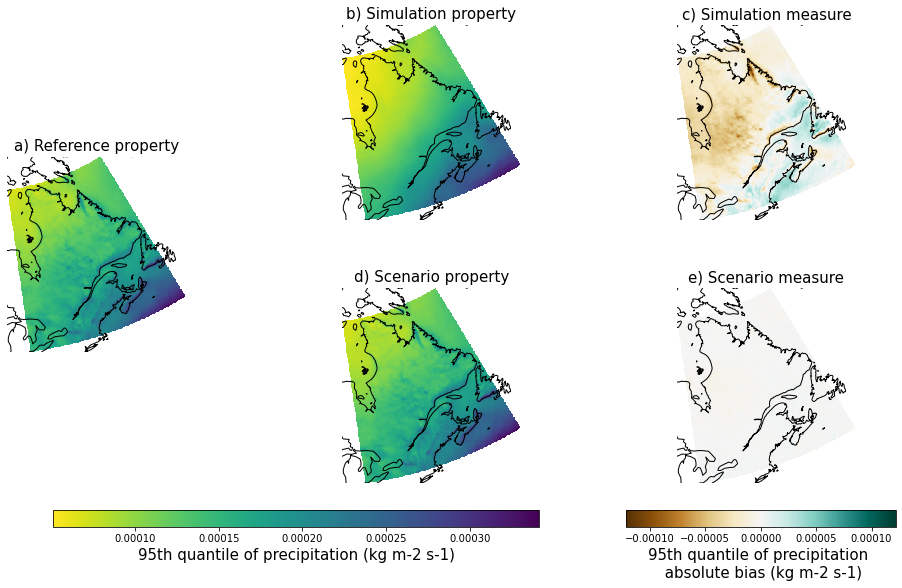

In [21]:
option_id ='CMIP6_ScenarioMIP_NIMS-KMA_KACE-1-0-G_ssp370_r1i1p1f1_global'
option_region = 'QC-rdrs'
option_var = 'q95_pr'
fig, axs, cbs=maps(option_id=option_id, option_region=option_region, option_var=option_var)
cbs[1].set_label('95th quantile of precipitation \n absolute bias (kg m-2 s-1)')

/exec/jlavoie/.conda/espo-g/lib/python3.9/site-packages/dask/array/reductions.py:640: RuntimeWarning: All-NaN slice encountered
/exec/jlavoie/.conda/espo-g/lib/python3.9/site-packages/dask/array/reductions.py:640: RuntimeWarning: All-NaN slice encountered
/exec/jlavoie/.conda/espo-g/lib/python3.9/site-packages/dask/array/reductions.py:640: RuntimeWarning: All-NaN slice encountered
/exec/jlavoie/.conda/espo-g/lib/python3.9/site-packages/dask/array/reductions.py:611: RuntimeWarning: All-NaN slice encountered
/exec/jlavoie/.conda/espo-g/lib/python3.9/site-packages/dask/array/reductions.py:611: RuntimeWarning: All-NaN slice encountered
/exec/jlavoie/.conda/espo-g/lib/python3.9/site-packages/dask/array/reductions.py:611: RuntimeWarning: All-NaN slice encountered
/exec/jlavoie/.conda/espo-g/lib/python3.9/site-packages/dask/array/reductions.py:640: RuntimeWarning: All-NaN slice encountered
/exec/jlavoie/.conda/espo-g/lib/python3.9/site-packages/dask/array/reductions.py:640: RuntimeWarning: Al

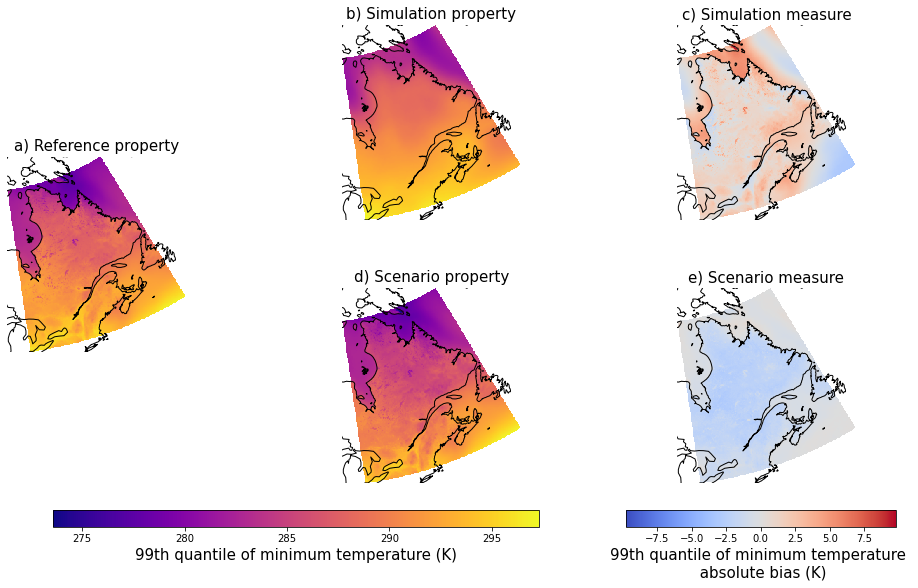

In [28]:
option_id ='CMIP6_ScenarioMIP_MIROC_MIROC6_ssp370_r1i1p1f1_global'
option_region = 'QC-rdrs'
option_var = 'q99_tasmin'
fig, axs, cbs=maps(option_id=option_id, option_region=option_region, option_var=option_var)
cbs[1].set_label('99th quantile of minimum temperature \n absolute bias (K)')

# improved


--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


[None, None, None, None]

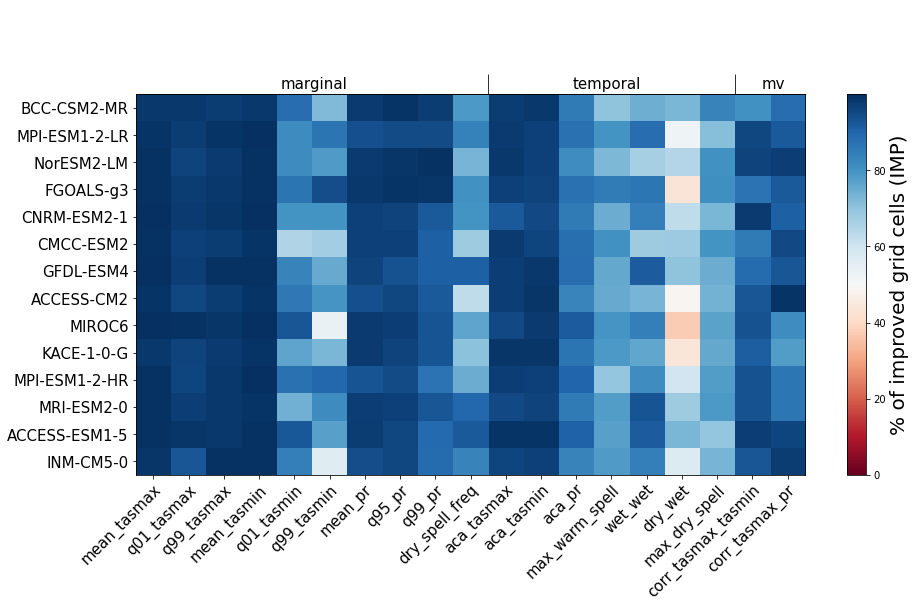

In [40]:
# ordered list of properties
order = [
        'mean_tasmax','q01_tasmax', 'q99_tasmax', 'mean_tasmin','q01_tasmin','q99_tasmin',
    'mean_pr','q95_pr','q99_pr','dry_spell_freq', 
    'aca_tasmax', 'aca_tasmin','aca_pr',
         'maximum_length_of_warm_spell','wet_wet_transition', 'dry_wet_transition', 'maximum_length_of_dry_spell',
        'corr_tasmax_tasmin','corr_tasmax_pr',
        ]
# name I want to show up on plot
better_name = [
        'mean_tasmax','q01_tasmax', 'q99_tasmax', 'mean_tasmin','q01_tasmin','q99_tasmin',
    'mean_pr','q95_pr','q99_pr','dry_spell_freq', 
    'aca_tasmax', 'aca_tasmin','aca_pr',
         'max_warm_spell','wet_wet', 'dry_wet', 'max_dry_spell',
        'corr_tasmax_tasmin','corr_tasmax_pr',
        ]

#assemble all improved into 1 dataset
dict_hm = pcat.search(processing_level='diag-improved', domain= 'QC-rdrs', experiment='ssp370').to_dataset_dict()
dict_hm= {ds.attrs['cat:source']:ds for name,ds in dict_hm.items()}
ds_merge=xs.diagnostics.measures_improvement_2d(dict_hm)


# convert to %
ds_merge['improved_grid_points']= ds_merge['improved_grid_points']*100
# select the right order
ds_merge= ds_merge.sel(properties=order)
# change the name
ds_merge['properties']=better_name

#plot
plt.figure(figsize=(15,7))
heatmap = ds_merge.improved_grid_points.plot.imshow(add_colorbar=True,vmin=0, cmap = 'RdBu',
                                                    cbar_kwargs={"orientation": "vertical"})
heatmap.colorbar.set_label('% of improved grid cells (IMP)', size=20)

plt.xticks( rotation=45, size=15, ha='right',rotation_mode='anchor')
plt.yticks(size=15)
plt.xlabel('')
plt.ylabel('')
y=1.03
plt.annotate(r"marginal",fontsize=15,xy=(0.26, y), xycoords='figure fraction')
plt.annotate(r"temporal",fontsize=15,xy=(0.53, y), xycoords='figure fraction')
plt.annotate(r"mv",fontsize=15,xy=(0.705, y), xycoords='figure fraction')
ax2 = plt.gca().secondary_xaxis('top')
ax2.tick_params(axis='x',length=20)
ax2.set_xticks([9.5,16.5])
plt.setp(ax2.get_xticklabels(), visible=False)




In [126]:
# get mean IMP 
print('q95_pr',ds_merge.sel(properties='q95_pr').improved_grid_points.mean(dim='datasets').values)
print('aca_pr',ds_merge.sel(properties='aca_pr').improved_grid_points.mean(dim='datasets').values)
print('aca_tasmax', ds_merge.sel(properties='aca_tasmax').improved_grid_points.mean(dim='datasets').values)

print('maximum_length_of_warm_spell',ds_merge.sel(properties='max_warm_spell').improved_grid_points.mean(dim='datasets').values)
print('maximum_length_of_dry_spell',ds_merge.sel(properties='max_dry_spell').improved_grid_points.mean(dim='datasets').values)
print('wet_wet_transition',ds_merge.sel(properties='wet_wet').improved_grid_points.mean(dim='datasets').values)
print('dry_wet_transition',ds_merge.sel(properties='dry_wet').improved_grid_points.mean(dim='datasets').values)

print('corr_tasmax_tasmin',ds_merge.sel(properties='corr_tasmax_tasmin').improved_grid_points.mean(dim='datasets').values)
print('corr_tasmax_pr',ds_merge.sel(properties='corr_tasmax_pr').improved_grid_points.mean(dim='datasets').values)

q95_pr 96.34362384921441
aca_pr 86.55843715815254
aca_tasmax 96.74133663765701
maximum_length_of_warm_spell 76.65530805396632
maximum_length_of_dry_spell 76.227262606608
wet_wet_transition 81.50692004117495
dry_wet_transition 58.66481443834565
corr_tasmax_tasmin 91.69094892819227
corr_tasmax_pr 90.77967840927792


# Domain

Text(0.5, 1.0, '')

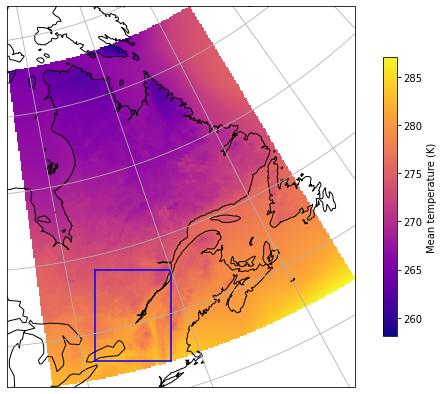

In [33]:
# This is the map projection we want to plot *onto*
map_proj = ccrs.RotatedPole(pole_longitude=87.59703063964844,
                          pole_latitude=31.758316040039062,
                         )
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection=map_proj,)


# something to plot as the domain
tg_mean = pcat.search(processing_level='indicators', source='GFDL-ESM4', experiment='ssp245', variable='tg_mean',
                     xrfreq='AS-JAN').to_dataset()
tg_mean = tg_mean.sel(time='1991')['tg_mean']

p = tg_mean.plot(
    cmap='plasma',add_colorbar=False,
    ax=ax,
)  


#rectangle for spatial subregion haudenausonee-rdrs-rot
lat_bnds= [ -14, -8 ]
lon_bnds= [ 370, 375 ]
ax.plot(np.linspace(lon_bnds[0], lon_bnds[1],15), np.linspace(lat_bnds[0], lat_bnds[0],15),
         color='blue', linestyle='-', transform=map_proj
         )

ax.plot(np.linspace(lon_bnds[0], lon_bnds[1],15), np.linspace(lat_bnds[1], lat_bnds[1],15),
         color='blue', linestyle='-',transform=map_proj
         )

ax.plot(np.linspace(lon_bnds[0], lon_bnds[0],15), np.linspace(lat_bnds[0], lat_bnds[1],15),
         color='blue', linestyle='-',transform=map_proj
         )

ax.plot(np.linspace(lon_bnds[1], lon_bnds[1],15), np.linspace(lat_bnds[0], lat_bnds[1],15),
         color='blue', linestyle='-',transform=map_proj
         )


# extra plotting details
cbar = plt.colorbar(p,fraction=0.025)
cbar.set_label('Mean temperature (K)')
ax.gridlines(crs=ccrs.PlateCarree())
ax.coastlines(resolution="50m")
ax.add_feature(cfeature.LAKES.with_scale("110m"), edgecolor='black', facecolor='none')
plt.title('')

# correlogram

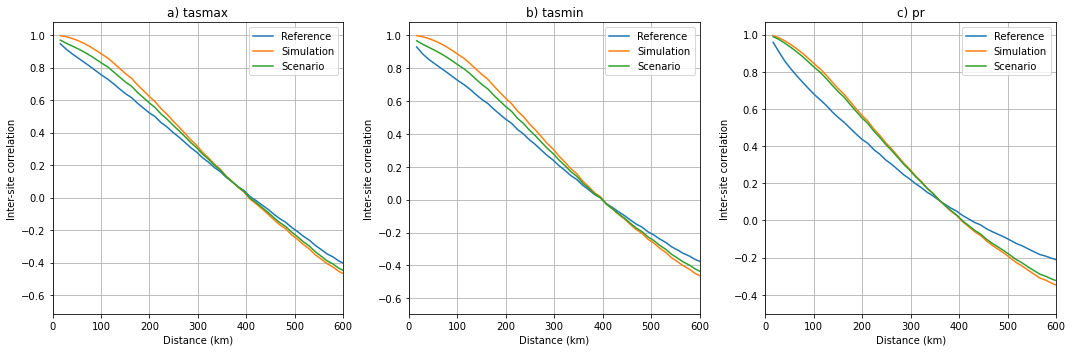

In [7]:
c_ref = pcat.search(processing_level='correlogram-ref', domain= 'Haudenosaunee-rdrs-rot' ).to_dask()
c_sim = pcat.search(processing_level='correlogram-sim',id ='CMIP6_ScenarioMIP_MRI_MRI-ESM2-0_ssp370_r1i1p1f1_global',  domain= 'Haudenosaunee-rdrs-rot' ).to_dask()
c_scen = pcat.search(processing_level='correlogram-scen',id ='CMIP6_ScenarioMIP_MRI_MRI-ESM2-0_ssp370_r1i1p1f1_global', domain= 'Haudenosaunee-rdrs-rot' ).to_dask()


fig, axs = plt.subplots(1,3, figsize=(15,5))
for i,(var,l) in enumerate(zip(['tasmax', 'tasmin', 'pr'], ['a)','b)', 'c)'])):
    ax =axs[i]
    c_ref[f"correlogram_{var}"].plot(label='Reference',ax=ax, color='tab:blue')
    c_sim[f"correlogram_{var}"].plot(label='Simulation',ax=ax, color='tab:orange')
    c_scen[f"correlogram_{var}"].plot(label='Scenario',ax=ax, color='tab:green')
    ax.set_xlim(0,600)
    ax.legend()
    ax.grid()
    ax.set_title(f"{l} {var}")
    ax.set_ylabel('Inter-site correlation')
    ax.set_xlabel('Distance (km)')
fig.tight_layout()



# Q-Q

In [2]:

with (Client(n_workers=2, threads_per_worker=5, memory_limit="25GB",dashboard_address= 6786,local_directory= '/exec/jlavoie/tmp_ic6/'),
     ):
    
    # get data
    ref= pcat.search(processing_level ='extracted',domain='QC-rdrs', calendar='default').to_dask()
    ref = ref.chunk({'time': -1}).sel(time=slice('1989','2018')).chunk(dict(loc=-1))

    sim= pcat.search(processing_level ='regridded',domain='QC-rdrs', id = 'CMIP6_ScenarioMIP_INM_INM-CM5-0_ssp370_r1i1p1f1_global').to_dask()
    sim = sim.chunk({'time': -1}).sel(time=slice('1989','2018')).chunk(dict(loc=-1))
    
    scen= pcat.search(processing_level ='final',domain='QC-rdrs', id = 'CMIP6_ScenarioMIP_INM_INM-CM5-0_ssp370_r1i1p1f1_global').to_dask()
    scen = scen.chunk({'time': -1}).sel(time=slice('1989','2018')).chunk(dict(rlat=-1, rlon=-1))
    
    #calculate quantiles
    quantiles = xc.sdba.utils.equally_spaced_nodes(50)
    ref_q={}
    sim_q={}
    scen_q={}
    for var in [ 'tasmax', 'tasmin','pr']:
        if var == 'pr': # only wet days
            ref['pr']=ref.pr.where(ref.pr> 1/86400)
            sim['pr']=sim.pr.where(sim.pr> 1/86400)
            scen['pr']=scen.pr.where(scen.pr> 1/86400)
        ref_q[var]=[]
        sim_q[var]=[]
        scen_q[var]=[]
        for q in quantiles:
            print(q)
            s_q=float(sim[var].quantile(q,skipna=True).values)
            print(s_q)
            ref_q[var].append(float(ref[var].quantile(q,skipna=True).values))
            sim_q[var].append(s_q)
            scen_q[var].append(float(scen[var].quantile(q,skipna=True).values))
print(ref_q)
print(sim_q)
print(scen_q)

0.01
246.17808532714844
0.03
251.09803771972656
0.05
254.27944946289062
0.06999999999999999
256.8619384765625
0.09
259.118896484375
0.11
261.1891784667969
0.13
263.0709533691406
0.15000000000000002
264.7655944824219
0.17
266.303466796875
0.19
267.6849670410156
0.21000000000000002
268.9114074707031
0.23
269.9926452636719
0.25
270.9428405761719
0.27
271.77288818359375
0.29000000000000004
272.4734191894531
0.31
273.0270080566406
0.33
273.3990783691406
0.35000000000000003
273.68048095703125
0.37
274.0531311035156
0.39
274.5320129394531
0.41000000000000003
275.063720703125
0.43
275.6286926269531
0.45
276.212158203125
0.47000000000000003
276.8077697753906
0.49
277.40753173828125
0.51
278.0089111328125
0.53
278.623291015625
0.55
279.2568359375
0.5700000000000001
279.9156799316406
0.59
280.6015625
0.61
281.31536865234375
0.63
282.0613708496094
0.65
282.8233337402344
0.67
283.5902099609375
0.6900000000000001
284.3463439941406
0.7100000000000001
285.0892639160156
0.73
285.8184814453125
0.75
286.

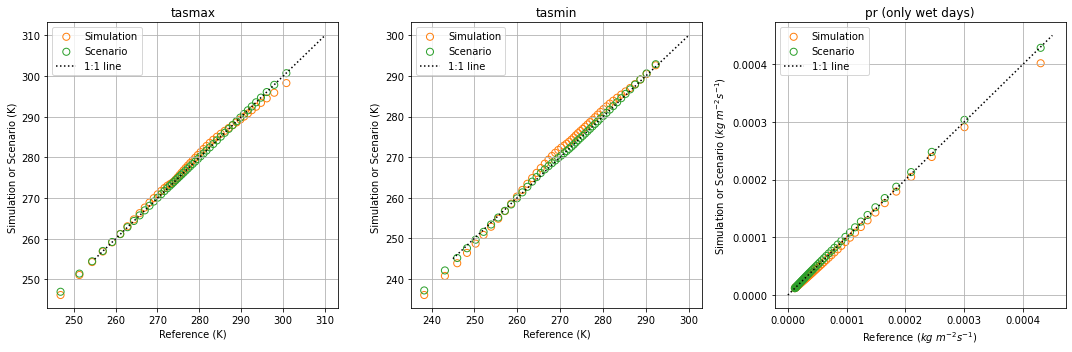

In [5]:

#plot quantiles
# QC-rdrs (copied from above)

ref_q={'tasmax': [246.85641479492188, 251.3549041748047, 254.39601135253906, 256.9382629394531, 259.1675109863281, 261.110595703125, 262.8271484375, 264.3592834472656, 265.7301025390625, 266.9640808105469, 268.0852355957031, 269.109375, 270.043701171875, 270.89306640625, 271.65606689453125, 272.338134765625, 272.9234619140625, 273.41259765625, 273.86419677734375, 274.31536865234375, 274.772705078125, 275.2410888671875, 275.720458984375, 276.2129821777344, 276.72271728515625, 277.2547607421875, 277.81085205078125, 278.3930358886719, 279.0008544921875, 279.6312255859375, 280.28912353515625, 280.9778137207031, 281.7044677734375, 282.4830627441406, 283.3119812011719, 284.1884765625, 285.10784912109375, 286.0499267578125, 286.99853515625, 287.9428405761719, 288.86883544921875, 289.7752990722656, 290.6700439453125, 291.57415771484375, 292.51580810546875, 293.5406188964844, 294.7030029296875, 296.08056640625, 297.8696594238281, 300.7700500488281], 'tasmin': [238.29998779296875, 243.12904357910156, 245.99972534179688, 248.280029296875, 250.292724609375, 252.14505004882812, 253.8950958251953, 255.56195068359375, 257.12591552734375, 258.581298828125, 259.93109130859375, 261.1900939941406, 262.3685302734375, 263.47161865234375, 264.51312255859375, 265.4935302734375, 266.417236328125, 267.28521728515625, 268.09552001953125, 268.8578186035156, 269.5797119140625, 270.2633056640625, 270.9091796875, 271.5200500488281, 272.1004638671875, 272.65673828125, 273.19342041015625, 273.6693115234375, 274.1783752441406, 274.72418212890625, 275.2803955078125, 275.8363037109375, 276.396728515625, 276.96917724609375, 277.555908203125, 278.158203125, 278.7781982421875, 279.42193603515625, 280.1002502441406, 280.81695556640625, 281.5804443359375, 282.40423583984375, 283.29425048828125, 284.2520446777344, 285.26812744140625, 286.3438415527344, 287.4804382324219, 288.72479248046875, 290.17327880859375, 292.3103332519531], 'pr': [1.1876269127242267e-05, 1.250330842594849e-05, 1.3161622428015108e-05, 1.3852980482624841e-05, 1.458025144529529e-05, 1.5343985069193877e-05, 1.6146737834787928e-05, 1.699058702797629e-05, 1.78788868652191e-05, 1.8814085706253536e-05, 1.979980333999265e-05, 2.0838770069531165e-05, 2.1932954041403718e-05, 2.3087586669134907e-05, 2.4303786631207913e-05, 2.5587431009626004e-05, 2.694159047678113e-05, 2.8372516680974513e-05, 2.988785672641825e-05, 3.149165058857761e-05, 3.319087772979401e-05, 3.4992695873370394e-05, 3.69044064427726e-05, 3.893798202625476e-05, 4.1102915638475685e-05, 4.341197563917376e-05, 4.5883174607297406e-05, 4.853082282352261e-05, 5.1380109653109685e-05, 5.444852286018431e-05, 5.776347461505793e-05, 6.13501833868213e-05, 6.524078344227746e-05, 6.948268855921924e-05, 7.412245031446218e-05, 7.920584903331473e-05, 8.480410906486213e-05, 9.100077295443043e-05, 9.789368050405756e-05, 0.00010559821384958923, 0.00011428952711867169, 0.0001241809077328071, 0.0001355693428195079, 0.00014888581732520846, 0.00016479195066494874, 0.00018439162202412264, 0.0002097012312151491, 0.000244786380790174, 0.00030042180209420566, 0.0004300625785253927]}
sim_q={'tasmax': [246.17808532714844, 251.09803771972656, 254.27944946289062, 256.8619384765625, 259.118896484375, 261.1891784667969, 263.0709533691406, 264.7655944824219, 266.303466796875, 267.6849670410156, 268.9114074707031, 269.9926452636719, 270.9428405761719, 271.77288818359375, 272.4734191894531, 273.0270080566406, 273.3990783691406, 273.68048095703125, 274.0531311035156, 274.5320129394531, 275.063720703125, 275.6286926269531, 276.212158203125, 276.8077697753906, 277.40753173828125, 278.0089111328125, 278.623291015625, 279.2568359375, 279.9156799316406, 280.6015625, 281.31536865234375, 282.0613708496094, 282.8233337402344, 283.5902099609375, 284.3463439941406, 285.0892639160156, 285.8184814453125, 286.5318298339844, 287.2286682128906, 287.9174499511719, 288.61016845703125, 289.3139343261719, 290.0417175292969, 290.80450439453125, 291.6072082519531, 292.4642333984375, 293.41400146484375, 294.5156555175781, 295.90252685546875, 298.2784729003906], 'tasmin': [236.04588317871094, 240.74598693847656, 243.8740692138672, 246.41966247558594, 248.70599365234375, 250.8358612060547, 252.8689727783203, 254.83714294433594, 256.7257385253906, 258.5513610839844, 260.2917785644531, 261.927001953125, 263.4462585449219, 264.8485412597656, 266.1348571777344, 267.3207092285156, 268.4040222167969, 269.3932189941406, 270.29400634765625, 271.0917053222656, 271.7786560058594, 272.3541564941406, 272.84429931640625, 273.3162841796875, 273.8098449707031, 274.32659912109375, 274.8529968261719, 275.3826599121094, 275.9112243652344, 276.4404296875, 276.9704284667969, 277.5063171386719, 278.05657958984375, 278.627197265625, 279.2228698730469, 279.84326171875, 280.4857482910156, 281.1493835449219, 281.8273620605469, 282.5125732421875, 283.20318603515625, 283.909912109375, 284.6405944824219, 285.402587890625, 286.1978759765625, 287.04534912109375, 287.9939270019531, 289.1018981933594, 290.4924011230469, 292.6342468261719], 'pr': [1.1849920156237204e-05, 1.2420289749570657e-05, 1.3015587683185004e-05, 1.3638220780194386e-05, 1.4289784303400666e-05, 1.4973255929362494e-05, 1.5690016880398616e-05, 1.644197436689865e-05, 1.7232177924597636e-05, 1.806509681046009e-05, 1.8942029782920144e-05, 1.986589631997049e-05, 2.083818253595382e-05, 2.186294659622945e-05, 2.294318073836621e-05, 2.4084414490062046e-05, 2.5293227736256085e-05, 2.6573552531772293e-05, 2.7930278520216234e-05, 2.936802957265172e-05, 3.089761230512522e-05, 3.2526080758543685e-05, 3.426048351684585e-05, 3.611507418099791e-05, 3.810205453191884e-05, 4.023162182420492e-05, 4.2514413507888094e-05, 4.4966527639189735e-05, 4.7610930159862667e-05, 5.0471728172851726e-05, 5.3569974952552015e-05, 5.6934361055027694e-05, 6.059759471099824e-05, 6.459919677581638e-05, 6.898152059875429e-05, 7.381673269264873e-05, 7.918247138150036e-05, 8.517113019479439e-05, 9.186084935208783e-05, 9.941089956555516e-05, 0.00010800281597767025, 0.00011787279800046235, 0.00012935977647430272, 0.00014292939158622175, 0.00015923863975331187, 0.0001792105800996072, 0.00020478126927628206, 0.0002392374452028891, 0.0002908897877205163, 0.0004016960100852885]}
scen_q={'tasmax': [246.9810333251953, 251.44041442871094, 254.4706573486328, 257.0052185058594, 259.2123107910156, 261.14520263671875, 262.8490295410156, 264.376953125, 265.747802734375, 266.9871826171875, 268.1194152832031, 269.15631103515625, 270.1037902832031, 270.9637756347656, 271.7354736328125, 272.4153137207031, 272.986083984375, 273.4693908691406, 273.92584228515625, 274.37615966796875, 274.8268737792969, 275.2836608886719, 275.752685546875, 276.23809814453125, 276.7427978515625, 277.2689514160156, 277.8189697265625, 278.3924560546875, 278.9906311035156, 279.6157531738281, 280.27044677734375, 280.9563293457031, 281.68536376953125, 282.4671936035156, 283.3008728027344, 284.18487548828125, 285.10955810546875, 286.0588073730469, 287.01361083984375, 287.959228515625, 288.8861083984375, 289.7937316894531, 290.68609619140625, 291.58843994140625, 292.529296875, 293.552490234375, 294.706298828125, 296.0740051269531, 297.84417724609375, 300.7032470703125], 'tasmin': [237.17247009277344, 242.09811401367188, 245.16542053222656, 247.5700225830078, 249.6702880859375, 251.60264587402344, 253.42140197753906, 255.1412811279297, 256.7794189453125, 258.354248046875, 259.87237548828125, 261.3310546875, 262.7043762207031, 263.9672546386719, 265.09716796875, 266.0983581542969, 266.9872131347656, 267.78289794921875, 268.5072326660156, 269.17584228515625, 269.8018493652344, 270.39239501953125, 270.9582214355469, 271.5072937011719, 272.0449523925781, 272.5749206542969, 273.10113525390625, 273.627685546875, 274.1585998535156, 274.6980895996094, 275.2491455078125, 275.8130798339844, 276.3892822265625, 276.979736328125, 277.58355712890625, 278.201171875, 278.8350830078125, 279.49041748046875, 280.1809387207031, 280.9187316894531, 281.7187805175781, 282.58428955078125, 283.5195007324219, 284.52734375, 285.5909729003906, 286.70306396484375, 287.8757629394531, 289.14886474609375, 290.6379699707031, 292.8974304199219], 'pr': [1.1838200407510158e-05, 1.2419300219335128e-05, 1.3082400073471945e-05, 1.382040045427857e-05, 1.4616200132877566e-05, 1.5458699635928497e-05, 1.6345700714737177e-05, 1.727739982015919e-05, 1.82566000148654e-05, 1.9285000234958716e-05, 2.0364499505376443e-05, 2.1498599380720407e-05, 2.2687700038659386e-05, 2.3934999262564816e-05, 2.524659976188559e-05, 2.6626099497661926e-05, 2.807710006891284e-05, 2.960439996968489e-05, 3.121270128758624e-05, 3.290750100859441e-05, 3.469279909040779e-05, 3.657730121631175e-05, 3.856690091197379e-05, 4.0673898183740675e-05, 4.290839933673851e-05, 4.528689896687865e-05, 4.7823799832258373e-05, 5.054090070188977e-05, 5.3467600082512945e-05, 5.6623099226271734e-05, 6.002490044920705e-05, 6.370079790940508e-05, 6.768420280423015e-05, 7.200409891083837e-05, 7.671309867873788e-05, 8.187480125343427e-05, 8.75472032930702e-05, 9.382690041093156e-05, 0.00010079229832626879, 0.00010857440065592527, 0.00011733850260498002, 0.00012729820446111262, 0.00013870850671082735, 0.0001520749065093696, 0.0001680426939856261, 0.00018773639749269933, 0.00021308633615262952, 0.00024809929891489446, 0.00030359061202034354, 0.00042845624382607545]}



fig, axs = plt.subplots(1,3, figsize=(15,5))

for var in ['tasmax']:
    axs[0].scatter(ref_q[var], sim_q[var],  s=50,label='Simulation', facecolors='none', edgecolors='tab:orange' )
    axs[0].scatter(ref_q[var], scen_q[var],s=50, label='Scenario', facecolors='none', edgecolors='tab:green' )
    axs[0].plot([255,310],[255,310], 'k:', label='1:1 line')
    axs[0].legend()
    axs[0].set_ylabel('Simulation or Scenario (K) ')
    axs[0].set_xlabel('Reference (K)')
    axs[0].set_title(var)
    axs[0].grid()
for var in ['tasmin']:
    axs[1].scatter(ref_q[var], sim_q[var],  s=50,label='Simulation', facecolors='none', edgecolors='tab:orange' )
    axs[1].scatter(ref_q[var], scen_q[var],s=50, label='Scenario', facecolors='none', edgecolors='tab:green' )
    axs[1].plot([245,300],[245,300], 'k:', label='1:1 line')
    axs[1].legend()
    axs[1].set_ylabel('Simulation or Scenario (K) ')
    axs[1].set_xlabel('Reference (K)')
    axs[1].set_title(var)
    axs[1].grid()

for var in [ 'pr']:
    axs[2].scatter(ref_q[var], sim_q[var],  s=50,label='Simulation', facecolors='none', edgecolors='tab:orange' )
    axs[2].scatter(ref_q[var], scen_q[var],s=50, label='Scenario', facecolors='none', edgecolors='tab:green' )
    axs[2].plot([0,0.00045],[0,0.00045], 'k:', label='1:1 line')
    axs[2].legend()
    axs[2].set_ylabel(r'Simulation or Scenario ($kg$ $m^{-2} s^{-1}$) ')
    axs[2].set_xlabel(r'Reference ($kg$ $m^{-2} s^{-1}$)')
    axs[2].set_title(f"{var} (only wet days)")
    axs[2].grid()
fig.tight_layout()
plt.savefig(f"{CONFIG['paths']['figures']}qq.png")


# ensemble variability


--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


INFO:xscen.ensembles:Creating ensemble with 14 simulations and calculating ensemble_percentiles.



--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


INFO:xscen.ensembles:Creating ensemble with 14 simulations and calculating ensemble_percentiles.
/tmp/ipykernel_40419/434477946.py:39: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.



--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


INFO:xscen.ensembles:Creating ensemble with 14 simulations and calculating ensemble_percentiles.



--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


INFO:xscen.ensembles:Creating ensemble with 14 simulations and calculating ensemble_percentiles.
/tmp/ipykernel_40419/434477946.py:39: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.



--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


INFO:xscen.ensembles:Creating ensemble with 14 simulations and calculating ensemble_percentiles.



--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


INFO:xscen.ensembles:Creating ensemble with 14 simulations and calculating ensemble_percentiles.
/tmp/ipykernel_40419/434477946.py:39: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.


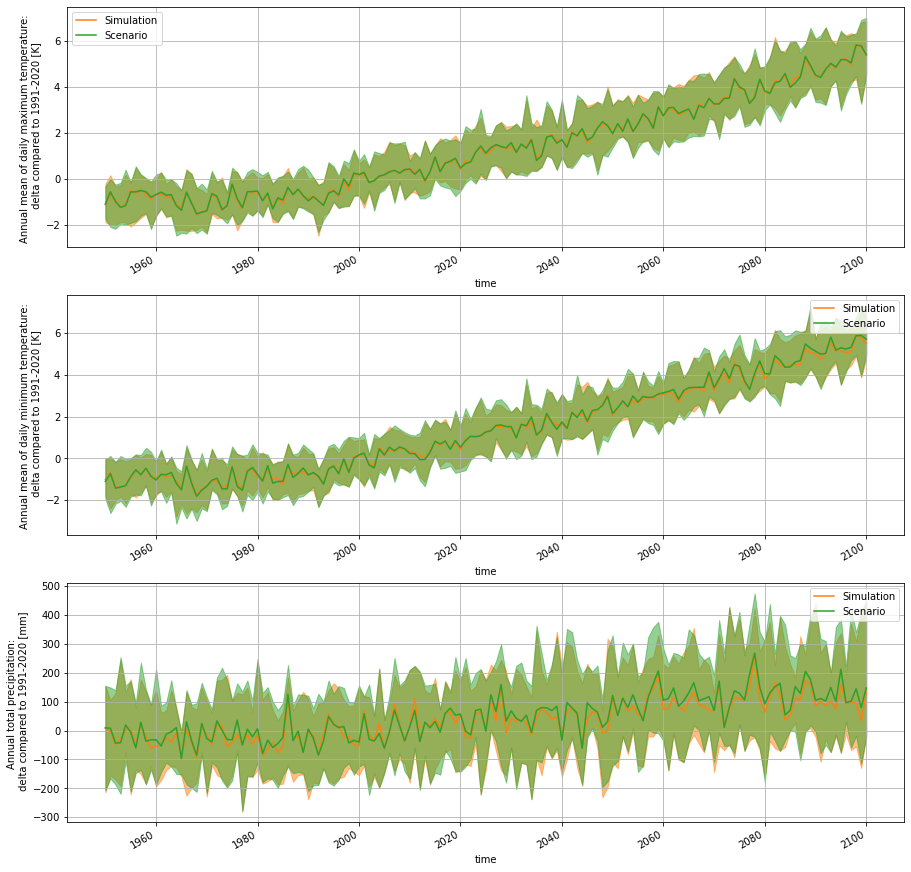

In [ ]:
lat= 45.5
lon=-73.5
lat=45.503895
var = 'tx_mean'
label={'tx_mean':'Annual mean of daily maximum temperature: \n delta compared to 1991-2020 [K]',
       'tn_mean':'Annual mean of daily minimum temperature: \n delta compared to 1991-2020 [K]',
      'prcptot':'Annual total precipitation: \n delta compared to 1991-2020 [mm]'}
func= {'prcptot': 'precip_accumulation',
      'tx_mean':'tx_mean',
      'tn_mean':'tn_mean'}
fig, axs = plt.subplots(3,1, figsize=(15,15))
for i,var in enumerate(['tx_mean', 'tn_mean', 'prcptot']):
    #get variable and compute indicators
    sim_dict = pcat.search(processing_level='regridded', experiment='ssp370', domain ='QC-rdrs').to_dataset_dict()    
    sim_dict= {i: getattr(xc.atmos, func[var])(ds=ds.where(ds.lat==lat, drop=True)).drop_vars('loc').squeeze()
               for i,ds in sim_dict.items()}
    # compute anomaly
    sim_dict = {i: ds - ds.sel(time=slice('1989','2018')).mean(dim='time') for i,ds in sim_dict.items()}
    # ensemble stats
    ens_sim = xs.ensembles.ensemble_stats(
                        datasets=sim_dict,
                        statistics={"ensemble_percentiles": {'split': False}},
                        common_attrs_only=False,
                    )[var]


    #same as above but for scen
    scen_dict = pcat.search(processing_level='indicators', domain='QC-rdrs',
                            variable=var, xrfreq='AS-JAN', experiment='ssp370').to_dataset_dict()
    scen_dict = {i: ds.where(ds.lat==lat, drop=True).squeeze() for i,ds in scen_dict.items()}
    scen_dict = {i: ds - ds.sel(time=slice('1989','2018')).mean(dim='time') for i,ds in scen_dict.items()}
    ens_scen = xs.ensembles.ensemble_stats(
                        datasets=scen_dict,
                        statistics={"ensemble_percentiles": {'split': False}},
                        common_attrs_only=False,
                    )[var]
    
    # make time fit to be able to plot
    ens_scen['time']=ens_scen['time'].to_index().to_datetimeindex()
    ens_sim['time']=ens_scen['time']
    
    #plot
    axs[i].fill_between(ens_sim.time, ens_sim.sel(percentiles=10), ens_sim.sel(percentiles=90), alpha=0.5, color='tab:orange')
    ens_sim.sel(percentiles=50).plot(label='Simulation', ax= axs[i], color='tab:orange')

    axs[i].fill_between(ens_scen.time, ens_scen.sel(percentiles=10), ens_scen.sel(percentiles=90), alpha=0.5, color='tab:green')
    ens_scen.sel(percentiles=50).plot(label='Scenario', ax= axs[i], color='tab:green')

    axs[i].legend()
    axs[i].grid()
    axs[i].set_title('')
    axs[i].set_ylabel(label[var])
